In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df_training = pd.read_csv('Google_Stock_Price_Train.csv')
df_testing = pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
df_training

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
df_testing

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [5]:
training_set = df_training.iloc[:,1:2] # Taking the open prices only


In [6]:
training_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [7]:
# Feature scaling 
# Whenever we have sigmoid fn at the end of NN we use normalization

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled 

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
training_set_scaled.shape

(1258, 1)

In [12]:
# Create a data structure with 60 timesteps to output 1 day value
timeStep = 60
X_train = []
Y_train = []

for i in range(60,training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])

X_train, Y_train = np.array(X_train),np.array(Y_train)

In [14]:
X_train.shape

(1198, 60)

In [15]:
Y_train.shape

(1198,)

In [16]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # Check keras documentation for RNN
#Last argument in this reshape parameter(1 in this case) is the number of indicators

In [18]:
X_train.shape

(1198, 60, 1)

In [17]:
# building the RNN (Stacked LSTM)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [20]:
regressor = Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1)) # predicting only one value at t = 1



In [21]:
regressor.compile(optimizer='adam',loss='mse')    #Keras documentation states RMSProp is recommended for RNN but we will use adam optimizer

In [22]:
regressor.fit(X_train,Y_train,epochs=100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 22s 143ms/step - loss: 0.1020
Epoch 2/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0047
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 7s 179ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0039
Epoch 13/100

38/38 [==============================] - 4s 108ms/step - loss: 0.0019
Epoch 100/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0016


In [40]:
df_testing

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [41]:
real_stock_price = df_testing.iloc[:,1:2].values

In [42]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [43]:
#Getting the predicted prices for the year 2017
# for predicting the first value of test set we need the previous 60 values as well


dataset_total = pd.concat((df_training['Open'],df_testing['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(df_testing) - 60:].values #first day of testing minus 60 to get all the earlier 60 days

In [44]:
# Reshape the 
inputs = inputs.reshape(-1,1) # we will get it in 1 column

In [45]:
# getting the 3d network
inputs = sc.transform(inputs)

In [46]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [47]:
inputs.shape

(80, 1)

In [48]:
X_test = []

for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

In [51]:
X_test.shape

(20, 60)

In [54]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [55]:
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [56]:
predicted_stock_price = regressor.predict(X_test)

In [57]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [58]:
predicted_stock_price

array([[786.9826 ],
       [784.3192 ],
       [784.463  ],
       [785.73724],
       [788.90106],
       [794.54364],
       [799.8034 ],
       [802.0745 ],
       [802.5288 ],
       [802.3562 ],
       [802.12714],
       [801.8655 ],
       [801.6886 ],
       [802.2098 ],
       [803.1741 ],
       [807.63226],
       [814.33966],
       [821.57947],
       [825.6416 ],
       [821.9482 ]], dtype=float32)

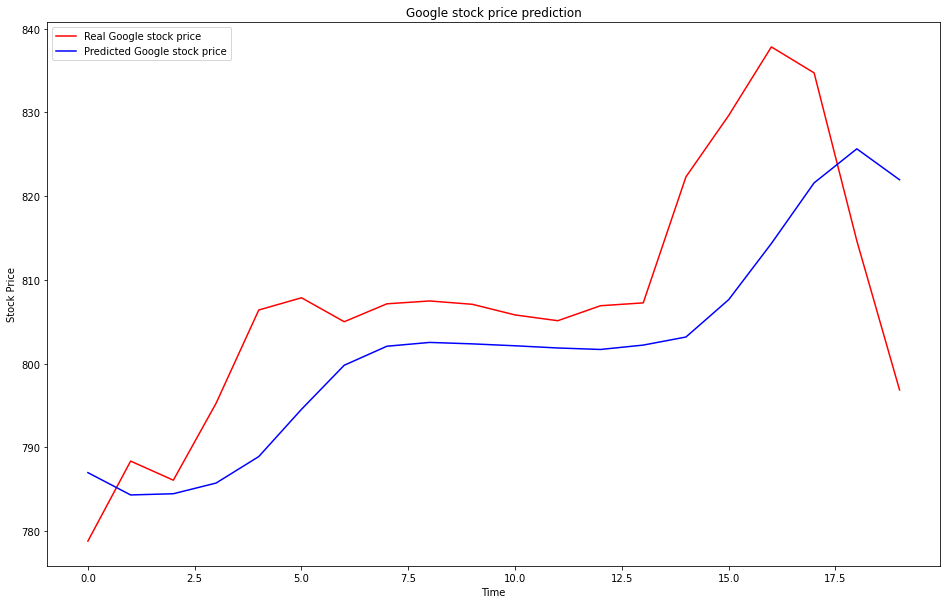

In [59]:
#Visualizing the results
plt.figure(figsize=(16,10))
plt.plot(real_stock_price,color='red',label='Real Google stock price')
plt.plot(predicted_stock_price, color='blue',label='Predicted Google stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

here are different ways to improve the RNN model:

Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.
Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).
Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.
Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.
Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.
Enjoy Deep Learning!